## **Linearization of a Function via the Jacobian Matrix**

The linearization of a function $ f: \mathbb{R}^n \to \mathbb{R}^m $ around a point $ \mathbf{x_0} $ can be expressed using the Jacobian matrix. The linear approximation, or first-order Taylor expansion, of the function $ f $ at $ \mathbf{x_0} $ is given by:

$$
\mathbf{y}(\mathbf{x}) = f(\mathbf{x_0}) + J_f(\mathbf{x_0}) \cdot (\mathbf{x} - \mathbf{x_0})
$$

where:
- $ \mathbf{y}(\mathbf{x}) $ is the linear approximation of $ f(\mathbf{x}) $,
- $ f(\mathbf{x_0}) $ is the value of the function at the point $ \mathbf{x_0} $,
- $ J_f(\mathbf{x_0}) $ is the Jacobian matrix of $ f $ evaluated at $ \mathbf{x_0} $,
- $ (\mathbf{x} - \mathbf{x_0}) $ is the vector difference between $ \mathbf{x} $ and $ \mathbf{x_0} $.

This formula provides a linear approximation of $ f $ around $ \mathbf{x_0} $, which is useful for studying the behavior of $ f $ near $ \mathbf{x_0} $.

### Suppose z = f(x1, x2) maps out a portion of sphere.
### 
- What will $ z_{\text{lin}} := f(x0) + J_f(x0)(x - x0) $ map out near the point x0?
###



In [1]:
using Plots, Symbolics, ForwardDiff

In [2]:
# Use GR backend for 3D plotting
gr()

# Defining variables and sphere functions (f and ∂f)
r = 1.0
fSphere(x1,x2) = sqrt(r^2 - (x1)^2 - (x2)^2)    # sphere function: z = sqrt(r^2 - x^2 - y^2)
x0 = [0.5; 0.5]                         # linearize around point x0
∂fSphere_∂x1(x1,x2) = -(x1) / sqrt(r^2 - (x1)^2 - (x2)^2)
∂fSphere_∂x2(x1,x2) = -(x2) / sqrt(r^2 - (x1)^2 - (x2)^2)

# Evaluate the Jacobian matrix at the point x0
A = [∂fSphere_∂x1(x0[1], x0[2]) ∂fSphere_∂x2(x0[1], x0[2])]

println("Jacobian matrix at x0"); display(A)

#=================== Jacobian using Symbolics and ForwardDiff ========================#
# @variables x1 x2 for using Symbolics
# fSphere = [sqrt(r^2 - (x1)^2 - (x2)^2)]
# A = Symbolics.jacobian(fSphere, [x1, x2])
# A_num = build_function(A, [x1, x2])
# A_num = eval(A_num[1])
# JA = ForwardDiff.jacobian(A_num, x0)
# display(JA)

# Linearization
flin(x1, x2) = fSphere(x0[1], x0[2]) + (A * ([x1; x2] - x0))[1]


1×2 Matrix{Float64}:
 -0.707107  -0.707107

Jacobian matrix at x0


flin (generic function with 1 method)

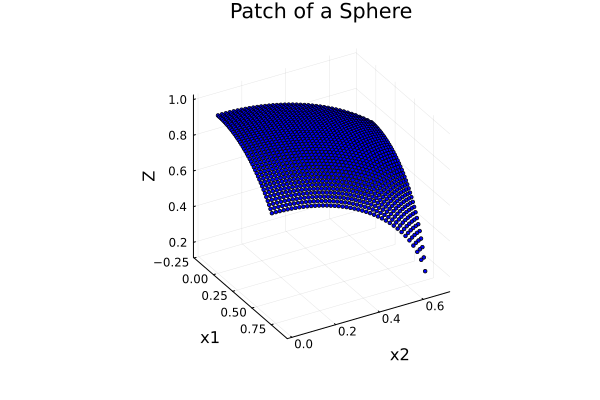

In [3]:
# Define the grid for x1 and x2 (only for positive x and y to represent a quarter sphere)
d1 = .7; d2 = .7
N1 = 40; N2 = 40
X1 = LinRange(0, d1, N1)  # Restrict x1 to positive values
X2 = LinRange(0, d2, N2)  # Restrict x2 to positive values
X1 = collect(X1)
X2 = collect(X2)

# Create arrays to store the function and linear approximation values
XYZ = zeros(4, N1 * N2)

# Compute f and flin values over the grid
k = 0
for i = 1:N1
    for j = 1:N2
        k += 1
        XYZ[:, k] = [X1[i]; X2[j]; fSphere(X1[i], X2[j]); flin(X1[i], X2[j])]
    end
end

# First Plot: Only the part of the sphere
plt_sphere = Plots.plot(XYZ[1, :], XYZ[2, :], XYZ[3, :], seriestype=:scatter, markersize=2, 
    aspect_ratio=:equal, legend=false, color=:blue, title="Patch of a Sphere")
plot!(plt_sphere, camera=(60, 30))  # Set the same camera angle for both plots

# Add labels
xlabel!(plt_sphere, "x1")
ylabel!(plt_sphere, "x2")
zlabel!(plt_sphere, "Z")

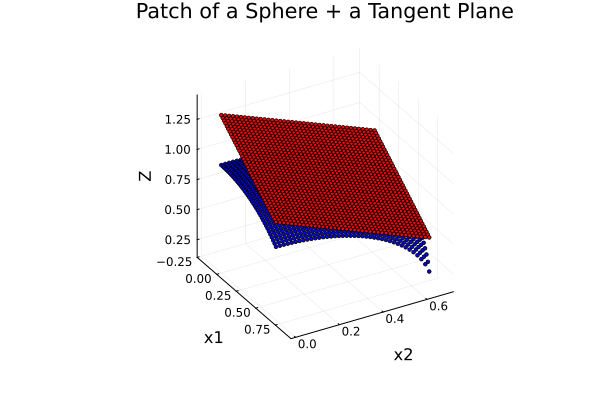

In [4]:
# Second Plot: The sphere and the tangent plane (linear approximation)
plt_sphere_tangent = Plots.plot(XYZ[1, :], XYZ[2, :], XYZ[3, :], seriestype=:scatter, markersize=2, aspect_ratio=:equal, legend=false, color=:blue)

# Add the tangent plane (red points)
Plots.plot!(plt_sphere_tangent, XYZ[1, :], XYZ[2, :], XYZ[4, :], seriestype=:scatter, 
    markersize=2, legend=false, color=:red, title="Patch of a Sphere + a Tangent Plane")

# Set the same camera angle
plot!(plt_sphere_tangent, camera=(60, 30))

# Add labels
xlabel!(plt_sphere_tangent, "x1")
ylabel!(plt_sphere_tangent, "x2")
zlabel!(plt_sphere_tangent, "Z")